In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pandas as pd

In [2]:
#import data
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egi_benchmark.csv")
data.head()

,Unnamed: 0,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,Label,Image
0,0,131,97,131,98,59,0,0,0.805619,Kartoffel,Kartoffel_0
1,1,128,111,141,106,61,0,0,0.796523,Kartoffel,Kartoffel_1
2,2,152,116,148,118,75,0,0,0.787971,Kartoffel,Kartoffel_2
3,3,111,108,153,122,76,0,0,0.794086,Kartoffel,Kartoffel_3
4,4,131,114,144,112,68,0,0,0.037900,Kartoffel,Kartoffel_4


In [3]:
data=data.drop(columns=["Unnamed: 0", "green pixels", "green onion pixels"])

In [4]:
data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=0
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=1
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=2

data["Label"]=data["Label"].astype("int")
data

,Hight,Width,R,G,B,ratio area,Label,Image
0,131,97,131,98,59,0.805619,1,Kartoffel_0
1,128,111,141,106,61,0.796523,1,Kartoffel_1
2,152,116,148,118,75,0.787971,1,Kartoffel_2
3,111,108,153,122,76,0.794086,1,Kartoffel_3
4,131,114,144,112,68,0.037900,1,Kartoffel_4
...,...,...,...,...,...,...,...,...
1172,88,65,107,76,40,0.753234,1,Kartoffel_Trieb_96
1173,106,74,105,71,29,0.772820,1,Kartoffel_Trieb_97
1174,89,77,100,70,34,0.749380,1,Kartoffel_Trieb_98
1175,131,91,106,76,43,0.704010,1,Kartoffel_Trieb_99


In [5]:
X=data.iloc[:,0:6]
X.head()

,Hight,Width,R,G,B,ratio area
0,131,97,131,98,59,0.805619
1,128,111,141,106,61,0.796523
2,152,116,148,118,75,0.787971
3,111,108,153,122,76,0.794086
4,131,114,144,112,68,0.037900


In [6]:
y=data.iloc[:,6]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int32

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,Hight,Width,R,G,B,ratio area
715,124,108,91,50,53,0.772737
43,182,173,152,126,75,0.006177
461,274,53,74,62,57,0.667401
535,167,67,111,81,56,0.411163
380,251,59,154,89,24,0.785401
...,...,...,...,...,...,...
1044,226,119,101,87,76,0.325110
1095,119,98,137,104,67,0.809981
1130,136,114,134,105,67,0.802632
860,261,47,141,127,70,0.473995


In [9]:
y_train

715     2
43      1
461     0
535     0
380     0
       ..
1044    2
1095    1
1130    1
860     0
1126    1
Name: Label, Length: 941, dtype: int32

In [10]:
clf = RandomForestClassifier(bootstrap=True, random_state=4, n_estimators=33)
#clf = RandomForestClassifier(random_state=None)
clf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=33, random_state=4)

In [11]:
y_test_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_traindata = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

Accuracy Test: 0.8728813559322034
Accuracy Train: 0.9989373007438895


Text(0.5, 1.0, 'Vegis TEST DATA')

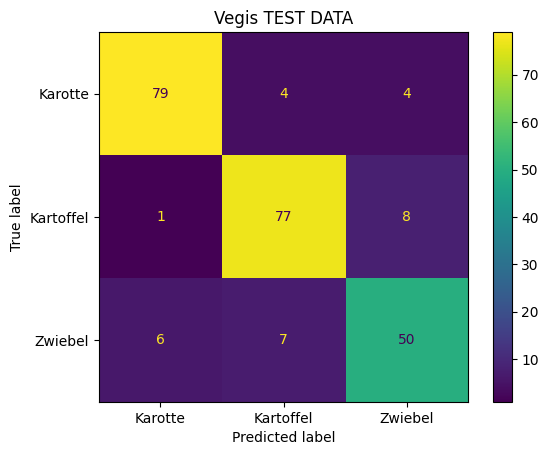

In [12]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")

Text(0.5, 1.0, 'Vegis TRAIN  DATA')

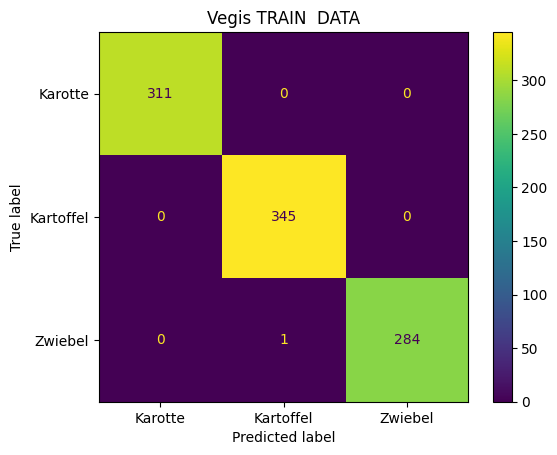

In [13]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

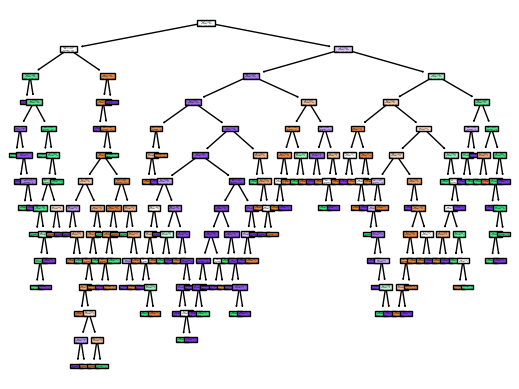

In [14]:
tree.plot_tree(clf.estimators_[0],
               feature_names = X.columns, 
               filled = True);